## Multi Armed Bandits Simulation
In this assignment you will simulate multi-armed bandits with different behaviours using numpy, there are a total of 3 different behaviours:
- One with probabilistic behaviour, which gives different outputs with a probability
- One which gives you a noisy reward, for each input

Note : All the rewards (or mean rewards) should be randomly generated and should not be hardcoded

In [87]:
# Import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt
import random

The probabilistic behaviour means for each of the arms there will be a randomly generated set of rewards, {r_1, r_2, ..., r_k} and randomly generated set of probabilities {p_1, p_2, ..., p_k}. After pulling any arm, you should choose one of the rewards in its reward set with its corresponding probability and return it. The choice of value of k is upto you, but you will need numpy for k > 2.

In [88]:
class MAB_probabilistic:
    def __init__(self, num_action : int = 10) -> None:
        # Code Here #
        par=np.zeros(num_action)
        for i in range(num_action):
          par[i]=random.random()
        rewar=np.zeros((2,num_action))
        for i in range(2):
          for j in range(num_action):
            rewar[i][j]=random.randrange(0,10)
        self.par=par
        self.rewar=rewar
        pass
    def act(self, action : int) -> float:
      prob=random.random()
      if prob<=self.par[action-1]:
        return self.rewar[0][action-1]
      else:
        return self.rewar[1][action-1]
        # Code Here #
        # pass

The noisy policy means for each arm, you should return a reward chosen from an underlying probability distribution (like gaussian, you can use numpy for this purpose) with a randomly generated mean and the given variance (passed to \_\_init\_\_)

In [116]:
class MAB_noisy:
    def __init__(self, noise_variance : float, num_action : int = 10) -> None:
        msd=np.zeros((num_action,2))
        for i in range(num_action):
          msd[i][0]=random.uniform(0,5)
          msd[i][1]=noise_variance
        # Code Here #
        self.noise_variance=noise_variance
        self.msd=msd

        pass
    def act(self, action : int) -> float:
        # Code Here #
        return np.random.normal(loc=self.msd[action-1][0], scale=self.noise_variance)
        pass

Initialize MAB_probabilistic with number of actions 5.
Perform an action for a fixed number of time and plot the average of first n rewards against n. Make such graphs for all 5 actions in single plot.

In [100]:
mprob=MAB_probabilistic(5)

In [101]:
mprob.par
mprob.rewar

array([[5., 4., 5., 1., 7.],
       [0., 9., 3., 7., 6.]])

Initialize MAB_noisy with number of actions 5.
Perform an action for a fixed number of time and plot the nth rewards against n. Make such graphs for all 5 actions in single plot.

In [117]:
mnoise=MAB_noisy(2,5)

In [118]:
mnoise.msd

array([[3.06973275, 2.        ],
       [3.53256571, 2.        ],
       [2.22179765, 2.        ],
       [0.27257428, 2.        ],
       [2.04218352, 2.        ]])

In [119]:
print((mnoise.act(2)))

2.9331069767105804


In [122]:
mprobdraw=np.zeros((5,1000),dtype=float)
for i in range(5):
  for j in range(1000):
    mprobdraw[i][j]=mprob.act(i+1)
mprobdraw

array([[5., 5., 5., ..., 5., 5., 5.],
       [9., 9., 9., ..., 9., 9., 9.],
       [5., 3., 3., ..., 5., 3., 5.],
       [1., 1., 1., ..., 1., 1., 7.],
       [6., 6., 6., ..., 6., 6., 6.]])

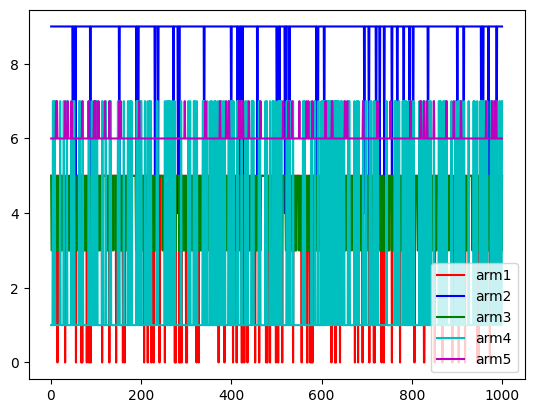

In [123]:
xax=np.zeros(1000)
for i in range(1000):
  xax[i]=i+1

plt.plot(xax,mprobdraw[0],color='r',label='arm1')
plt.plot(xax,mprobdraw[1],color='b',label='arm2')
plt.plot(xax,mprobdraw[2],color='g',label='arm3')
plt.plot(xax,mprobdraw[3],color='c',label='arm4')
plt.plot(xax,mprobdraw[4],color='m',label='arm5')

plt.legend()
plt.show()

In [124]:
mnoisedraw=np.zeros((5,1000),dtype=float)
for i in range(5):
  for j in range(1000):
    mnoisedraw[i][j]=mnoise.act(i+1)
mnoisedraw

array([[ 3.36532538,  7.00596019,  6.05111644, ...,  0.99121923,
         5.71882149,  2.90883783],
       [ 4.33245428,  2.32684853,  4.76887062, ...,  2.63564924,
         2.44981816,  2.35164918],
       [ 2.66644444,  3.27019659,  1.60023623, ...,  3.05554514,
         4.51512986, -1.09932735],
       [-3.89307208, -0.3834151 ,  1.84698141, ...,  0.45392287,
        -2.96484246,  4.39625684],
       [ 4.61379339,  3.11955354,  2.37484803, ..., -0.54906495,
         0.90191127,  3.35617193]])

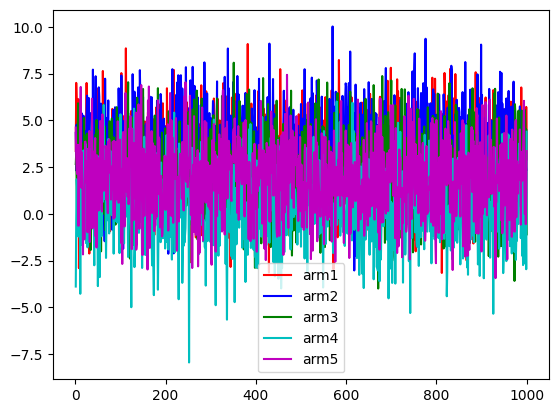

In [125]:
for i in range(100):
  xax[i]=i+1

plt.plot(xax,mnoisedraw[0],color='r',label='arm1')
plt.plot(xax,mnoisedraw[1],color='b',label='arm2')
plt.plot(xax,mnoisedraw[2],color='g',label='arm3')
plt.plot(xax,mnoisedraw[3],color='c',label='arm4')
plt.plot(xax,mnoisedraw[4],color='m',label='arm5')

plt.legend()
plt.show()

Optional : Initialize any one of the above classes and find the optimal action, you can only use act() function and cannot access any class variables. Please do not search for methods on google or anywhere else, this is just a simple exercise for your own thinking.